Output Coordinates of Fitted Spline (Limited Points):
[
  [ -1.738707, 2.262010 ],
  [ -1.455001, 2.296807 ],
  [ -1.291989, 2.216651 ],
  [ -1.220469, 2.048378 ],
  [ -1.211244, 1.818822 ],
  [ -1.235112, 1.554817 ],
  [ -1.262876, 1.283198 ],
  [ -1.269486, 1.027288 ],
  [ -1.256744, 0.787686 ],
  [ -1.237130, 0.555954 ],
  [ -1.223156, 0.323629 ],
  [ -1.225932, 0.083074 ],
  [ -1.243857, -0.165856 ],
  [ -1.268540, -0.419305 ],
  [ -1.291529, -0.673378 ],
  [ -1.304371, -0.924183 ],
  [ -1.298613, -1.167825 ],
  [ -1.265305, -1.399691 ],
  [ -1.187425, -1.603458 ],
  [ -1.043129, -1.753701 ],
  [ -0.846049, -1.833413 ],
  [ -0.642493, -1.834052 ],
  [ -0.463860, -1.756530 ],
  [ -0.324211, -1.611550 ],
  [ -0.236758, -1.410299 ],
  [ -0.214088, -1.164227 ],
  [ -0.239234, -0.897397 ],
  [ -0.253823, -0.651456 ],
  [ -0.218008, -0.454354 ],
  [ -0.127161, -0.309603 ],
  [ 0.020121, -0.218476 ],
  [ 0.225200, -0.182209 ],
  [ 0.482032, -0.194935 ],
  [ 0.768530, -0.235407 ],
  [ 1.06

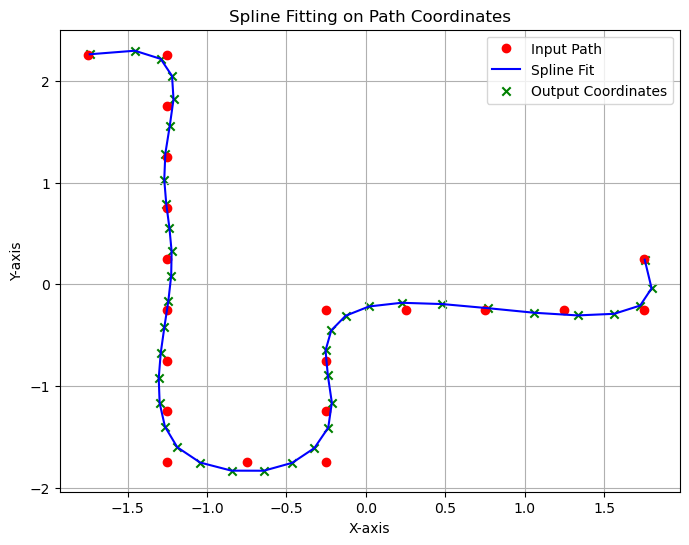

In [1]:
#Spline fit for At start position.
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Input path coordinates
path = np.array([
    [-1.75, 2.25],
    [-1.25, 2.25],
    [-1.25, 1.75],
    [-1.25, 1.25],
    [-1.25, 0.75],
    [-1.25, 0.25],
    [-1.25, -0.25],
    [-1.25, -0.75],
    [-1.25, -1.25],
    [-1.25, -1.75],
    [-0.75, -1.75],
    [-0.25, -1.75],
    [-0.25, -1.25],
    [-0.25, -0.75],
    [-0.25, -0.25],
    [0.25, -0.25],
    [0.75, -0.25],
    [1.25, -0.25],
    [1.75, -0.25],
    [1.75, 0.25] 
])

# Number of points between successive input path coordinates
num_points_between = 2

# Extract x and y coordinates from the input path
x_input = path[:, 0]
y_input = path[:, 1]

# Fit a spline to the input path
tck, u = splprep([x_input, y_input], s=0.1)
u_new = np.linspace(u.min(), u.max(), (len(path)-1)*num_points_between + 2)
spline_fit_curve = splev(u_new, tck)

# Output coordinates of the fitted spline with commas
output_coordinates = np.column_stack((spline_fit_curve[0], spline_fit_curve[1]))

# Print the output coordinates with commas and enclosing square brackets
print("Output Coordinates of Fitted Spline (Limited Points):")
print("[")
for i, coord in enumerate(output_coordinates):
    if i == len(output_coordinates) - 1:
        print(f"  [ {coord[0]:.6f}, {coord[1]:.6f} ]")
    else:
        print(f"  [ {coord[0]:.6f}, {coord[1]:.6f} ],")
print("]")

# Plot the input path, the fitted spline, and the output coordinates
plt.figure(figsize=(8, 6))
plt.plot(x_input, y_input, 'ro', label='Input Path')
plt.plot(spline_fit_curve[0], spline_fit_curve[1], 'b-', label='Spline Fit')
plt.scatter(output_coordinates[:, 0], output_coordinates[:, 1], c='g', marker='x', label='Output Coordinates')
plt.title('Spline Fitting on Path Coordinates')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()